In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning and Preparation 

In [2]:
#Reading the dataset
uber_df = pd.read_csv("Uber Request Data.csv")
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#Details of df
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
#Summary of numeric coloumn
uber_df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
# Checking rows and columns of df
uber_df.shape

(6745, 6)

In [6]:
#Checking for column-wise null count
print(uber_df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


Text(0.5,1,'% Missing values')

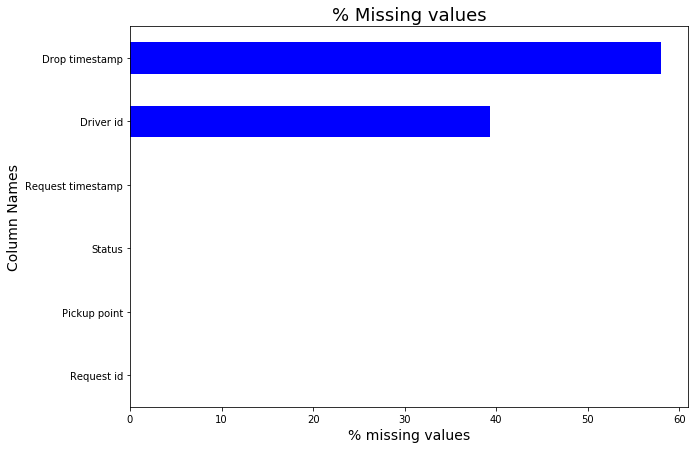

In [7]:
# Graph showing % of null values

plt.figure(figsize=(10,7))
missing_val_percentage = ((uber_df.isnull().sum() / uber_df.shape[0])*100).sort_values()
missing_val_percentage.plot(kind = "barh", color = "blue")
plt.xlabel("% missing values", size = 14)
plt.ylabel("Column Names", size = 14)
plt.title("% Missing values", size = 18)

In [8]:
#Checking for row-wise null count
rowwise = uber_df.isnull().sum(axis=1)
print(rowwise)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6715    2
6716    2
6717    2
6718    2
6719    2
6720    2
6721    2
6722    2
6723    2
6724    2
6725    2
6726    2
6727    2
6728    2
6729    2
6730    2
6731    2
6732    2
6733    2
6734    2
6735    2
6736    2
6737    2
6738    2
6739    2
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64


In [9]:
#Checking for column-wise null percentages
(uber_df.isnull().sum()/uber_df.shape[0])*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [10]:
#Checking for dupliacte data
sum(uber_df.duplicated())

0

In [11]:
#Rearranging Request and Drop timestamps column to datetime format
uber_df["Request timestamp"] = pd.to_datetime(uber_df["Request timestamp"], dayfirst=True)

uber_df["Drop timestamp"] = pd.to_datetime(uber_df["Drop timestamp"], dayfirst=True)

uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
#Creating new derived columns from Request and Drop timestamps as Day,Time and hours

#Request timestamp
uber_df["Request_Day"] = uber_df["Request timestamp"].dt.date    #Day
uber_df["Request_Time"] = uber_df["Request timestamp"].dt.time   #Time
uber_df["Request_hours"] = uber_df["Request timestamp"].dt.hour  #Hours

#Drop timestamp
uber_df["Drop_Day"] = uber_df["Drop timestamp"].dt.date          #Day
uber_df["Drop_Time"] = uber_df["Drop timestamp"].dt.time         #Time
uber_df["Drop_hours"] = uber_df["Drop timestamp"].dt.hour        #Hours

uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Time,Request_hours,Drop_Day,Drop_Time,Drop_hours
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,9.0


In [13]:
#Creating a new derived column from Days columns as times of the day

#Morning (05:00 AM to 12:00 PM)
uber_df.loc[(pd.to_datetime(uber_df["Request timestamp"]).dt.hour>5) & 
            (pd.to_datetime(uber_df["Request timestamp"]).dt.hour<12),"Times_of_Day"] = "Morning"

#Afternoon (12:00 PM to 03:00 PM)
uber_df.loc[(pd.to_datetime(uber_df["Request timestamp"]).dt.hour>=12) & 
           (pd.to_datetime(uber_df["Request timestamp"]).dt.hour<=15),"Times_of_Day"] = "Afternoon"

#Evening (03:00 PM to 07:00 PM)
uber_df.loc[(pd.to_datetime(uber_df["Request timestamp"]).dt.hour>15) &
           (pd.to_datetime(uber_df["Request timestamp"]).dt.hour<19),"Times_of_Day"] = "Evening"

#Late Evening (07:00 PM to 09:00 PM)
uber_df.loc[(pd.to_datetime(uber_df["Request timestamp"]).dt.hour>=19) &
          (pd.to_datetime(uber_df["Request timestamp"]).dt.hour<=21),"Times_of_Day"] = "Late Evening"

#Night (09:00 PM to 12:00 AM)
uber_df.loc[(pd.to_datetime(uber_df["Request timestamp"]).dt.hour>21) & 
          (pd.to_datetime(uber_df["Request timestamp"]).dt.hour<24),"Times_of_Day"] = "Night"

#Mid Night (12:00 AM to 05:00 AM)
uber_df.loc[(pd.to_datetime(uber_df["Request timestamp"]).dt.hour>=0) & 
          (pd.to_datetime(uber_df["Request timestamp"]).dt.hour<=5),"Times_of_Day"] = "Mid Night"

uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_Day,Request_Time,Request_hours,Drop_Day,Drop_Time,Drop_hours,Times_of_Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,13.0,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,18.0,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,9.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,22.0,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,9.0,Morning


# Visually identify the most pressing problems for Uber

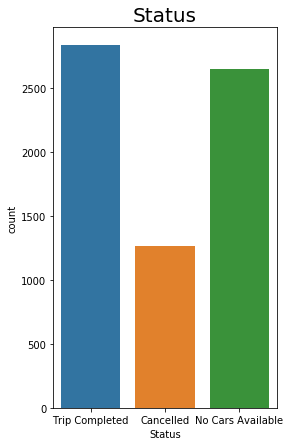

In [14]:
#Plot the status column to find the total trip completed, cancelled or no car available

plt.subplots(figsize = (4,7))
plt.title("Status", size = 20)
sns.countplot(uber_df['Status'])

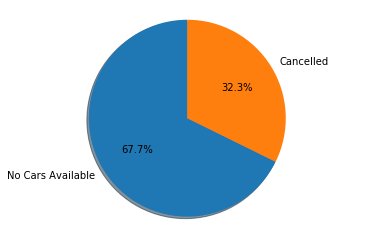

In [15]:
#To Identify the major issue between no cars available and car cancelled

#Define a pie chart variable 
def pie_chart(dataframe):
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    f1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

#To define a condition for pie chart as per status
uber_df1 = uber_df[(uber_df["Status"]=="Cancelled") | (uber_df["Status"]=="No Cars Available")]

uber_df1_Plot = pd.DataFrame(uber_df1.Status.value_counts())
pie_chart(uber_df1_Plot)

### It can be seen that unavailability of cars is major issue.

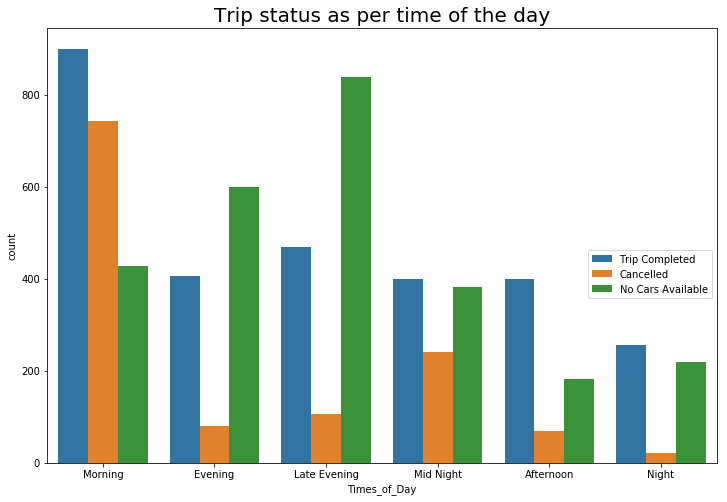

In [16]:
#Plot the status as per the times of day

plt.subplots(figsize = (12,8))
Plot1 = sns.countplot(x = 'Times_of_Day',hue = 'Status',data = uber_df)
plt.title("Trip status as per time of the day", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

### In morning it is found that major of the trips are cancelled.
### In Evening and late evening unavailability of cars is the major issue.

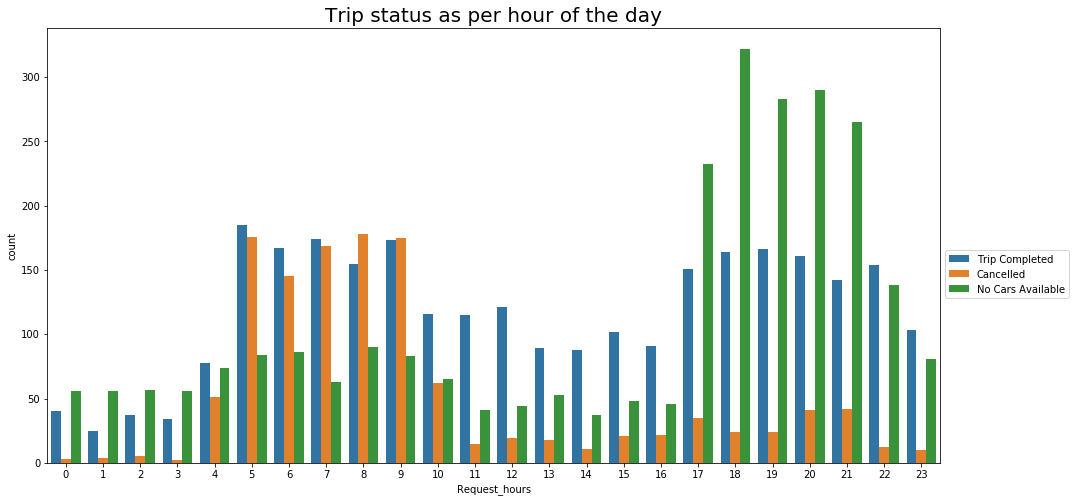

In [17]:
#Plot the status as per the hour of the day

plt.subplots(figsize = (16,8))
Plot1 = sns.countplot(x = 'Request_hours',hue = 'Status',data = uber_df)
plt.title("Trip status as per hour of the day", size = 20)
plt.legend(bbox_to_anchor = (1.15, 0.5), loc = 'best')

### It can be seen that from 05:00 to 09:00 is the time when most trips are cancelled.
### It can also be identified that from 17:00 to 22:00 is the time when there is shortage of cars.

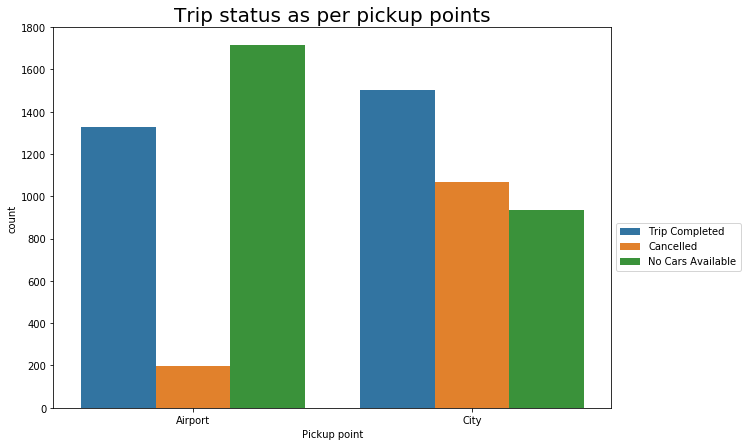

In [18]:
#Plot the status as per pickup point

plt.subplots(figsize = (10,7))
Plot2 = sns.countplot(x = 'Pickup point',hue = 'Status',data = uber_df)
plt.title("Trip status as per pickup points", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

### Airport: The major issue is unavailability of cars.
### City: The major issue is cancellation.

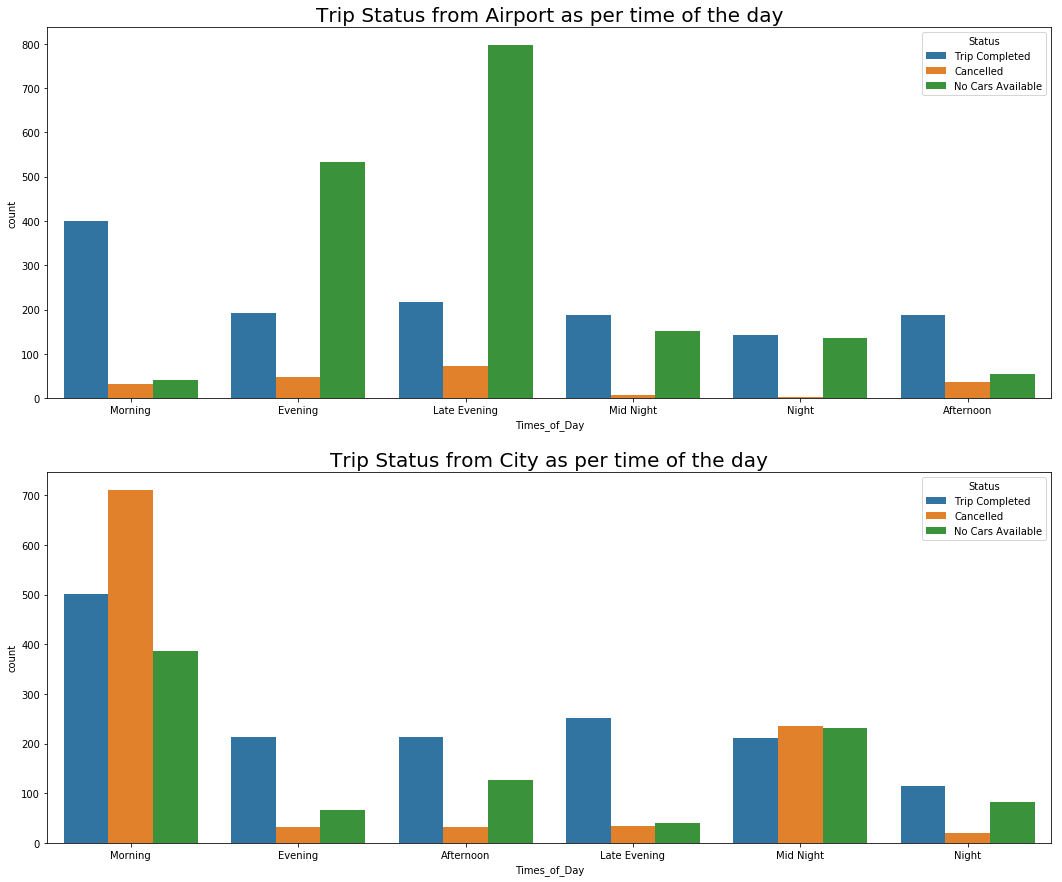

In [20]:
#Plot for status as per pickup locations for time of the day 
uber_df_airport = uber_df[(uber_df['Pickup point'] == 'Airport')]
uber_df_city = uber_df[(uber_df['Pickup point'] == 'City')]

plt.subplots(figsize = (18, 15))

#subplot 1
plt.subplot(2, 1, 1)
plt.title('Trip Status from Airport as per time of the day', size = 20)
sns.countplot(x = "Times_of_Day", hue = 'Status', data = uber_df_airport);

#subplot 2
plt.subplot(2, 1, 2)
plt.title('Trip Status from City as per time of the day', size = 20)
sns.countplot(x = "Times_of_Day", hue = 'Status', data = uber_df_city);

plt.show()

### Airport: The major issue exist in evening and late evening.
### City: The major issue exist in morning.

# The Gap between Supply and Demand (Overall)

In [21]:
# To create a copy of df

uber_df1 = pd.DataFrame()
uber_df1 = uber_df.copy()
uber_df1['Status'] = 'Demand'
uber_df2 = uber_df.append(uber_df1)

# Replaceing no car available and cancelled status as gap
# Replaceing Trip completed as supply
uber_df2['Status'] = uber_df2['Status'].replace(['Cancelled','No Cars Available'],'Gap')
uber_df2['Status'] = uber_df2['Status'].replace(['Trip Completed'],'Supply')

In [22]:
# To Check for overall supply demand and gap accross city and airport

# Total Demand
Total_Demand_Overall = uber_df2[(uber_df2["Status"] == "Demand")] 
print(len(Total_Demand_Overall.index))

# Total Supply
Total_Supply_Overall = uber_df2[(uber_df2["Status"] == 'Supply')]
print(len(Total_Supply_Overall.index))

# Total Supply-Demand Gap
Supply_Demand_Gap_Overall = uber_df2[(uber_df2["Status"] == 'Gap')]
print(len(Supply_Demand_Gap_Overall.index))

#Percentage difference in demand supply
Percentage_Diff_Overall = (((len(uber_df2[(uber_df2["Status"] == 'Supply')].index))/(len(uber_df2[(uber_df2["Status"] == 'Demand')].index)))*100)
print(Percentage_Diff_Overall)

6745
2831
3914
41.971830985915496


# City Wise Analysis

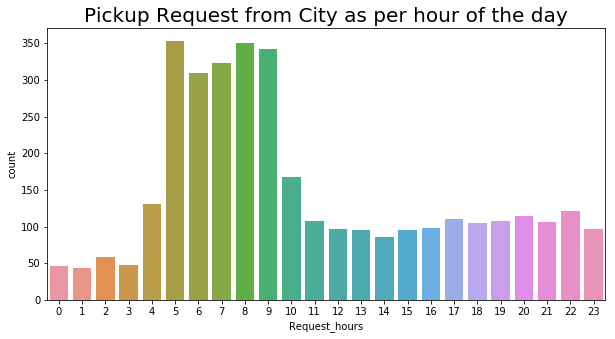

In [23]:
#Plot pickup request from city as per hour of the day
uber_df_city1 = uber_df1[(uber_df1['Pickup point'] == 'City')] 
plt.subplots(figsize = (10, 5))

plt.title('Pickup Request from City as per hour of the day', size = 20)
sns.countplot(x = "Request_hours",  data = uber_df_city1)

plt.show()

# The Gap between Supply and Demand (City)

In [24]:

# Total Demand in City
Total_Demand_City = uber_df2[(uber_df2["Pickup point"] == "City") & (uber_df2["Status"] == "Demand")] 
print(len(Total_Demand_City.index))

# Total Supply in City
Total_Supply_City = uber_df2[(uber_df2["Pickup point"] == "City") & (uber_df2["Status"] == "Supply")]
print(len(Total_Supply_City.index))

# Total Gap in City
Supply_Demand_Gap_City = uber_df2[(uber_df2["Pickup point"] == "City") & (uber_df2["Status"] == "Gap")] 
print(len(Supply_Demand_Gap_City.index))

#Percentage difference in demand supply
Percentage_Diff_City = (((len(uber_df2[(uber_df2["Pickup point"] == "City") & (uber_df2["Status"] == "Supply")].index))/
                            (len(uber_df2[(uber_df2["Pickup point"] == "City") & (uber_df2["Status"] == "Demand")].index)))*100)
print(Percentage_Diff_City)

3507
1504
2003
42.88565725691475


In [36]:
# To check the status of cabs as per time of day and find the difference between trip completed and rejected

uber_df_overall = uber_df.groupby(['Times_of_Day','Status']).count()['Request id'].unstack()
uber_df_overall = uber_df_overall.fillna(0)
uber_df_overall['Total'] = uber_df_overall['Cancelled']+uber_df_overall['No Cars Available']+uber_df_overall['Trip Completed']
uber_df_overall['Difference'] = uber_df_overall['Total'] - uber_df_overall['Trip Completed']

#To find the percentage difference
uber_df_overall['Percentage_Difference'] = ((uber_df_overall['Difference'] / uber_df_overall['Total'])*100).round(2)
uber_df_overall

Status,Cancelled,No Cars Available,Trip Completed,Total,Difference,Percentage_Difference
Times_of_Day,,,,,,
Afternoon,69,182,400,651,251,38.56
Evening,81,600,406,1087,681,62.65
Late Evening,107,838,469,1414,945,66.83
Mid Night,241,383,399,1023,624,61.00
Morning,744,428,900,2072,1172,56.56
Night,22,219,257,498,241,48.39


In [25]:
# To check the status of cabs as per time of day from city and find the difference between trip completed and rejected

uber_df_city1 = uber_df_city.groupby(['Times_of_Day','Status']).count()['Request id'].unstack()
uber_df_city1 = uber_df_city1.fillna(0)
uber_df_city1['Total'] = uber_df_city1['Cancelled']+uber_df_city1['No Cars Available']+uber_df_city1['Trip Completed']
uber_df_city1['Difference'] = uber_df_city1['Total'] - uber_df_city1['Trip Completed']

#To find the percentage difference
uber_df_city1['Percentage_Difference_City'] = ((uber_df_city1['Difference'] / uber_df_city1['Total'])*100).round(2)
uber_df_city1

Status,Cancelled,No Cars Available,Trip Completed,Total,Difference,Percentage_Difference_City
Times_of_Day,,,,,,
Afternoon,33,127,213,373,160,42.90
Evening,33,67,213,313,100,31.95
Late Evening,35,41,251,327,76,23.24
Mid Night,235,232,211,678,467,68.88
Morning,711,387,501,1599,1098,68.67
Night,19,83,115,217,102,47.00


In [26]:
uber_df_city2 = uber_df2[(uber_df2['Pickup point'] == 'City')] 
uber_df_city2.loc[uber_df_city2["Status"] == "Supply","Service"] = "Satisfied"
uber_df_city2.loc[uber_df_city2["Status"] == "Gap","Service"] = "Unsatisfied"

D:\Anaconda_Setup\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda_Setup\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


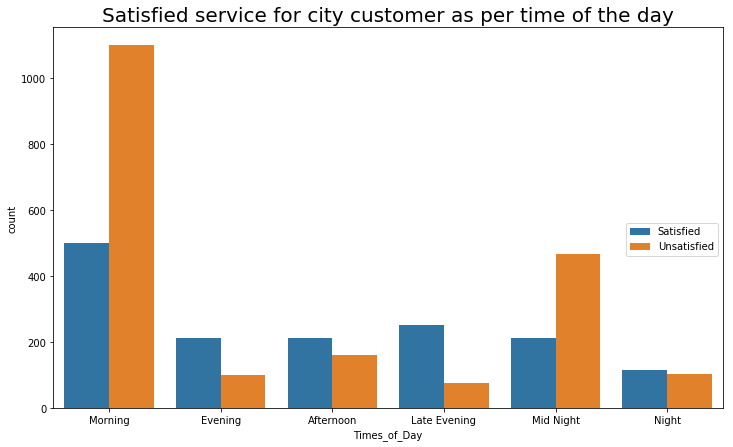

In [27]:
#Plot the satisfication of city customer as per time of the day

plt.subplots(figsize = (12,7))
Plot2 = sns.countplot(x = 'Times_of_Day',hue = 'Service',data = uber_df_city2)
plt.title("Satisfied service for city customer as per time of the day", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

### Most unsatisfied customers from city are at morning and mid night.

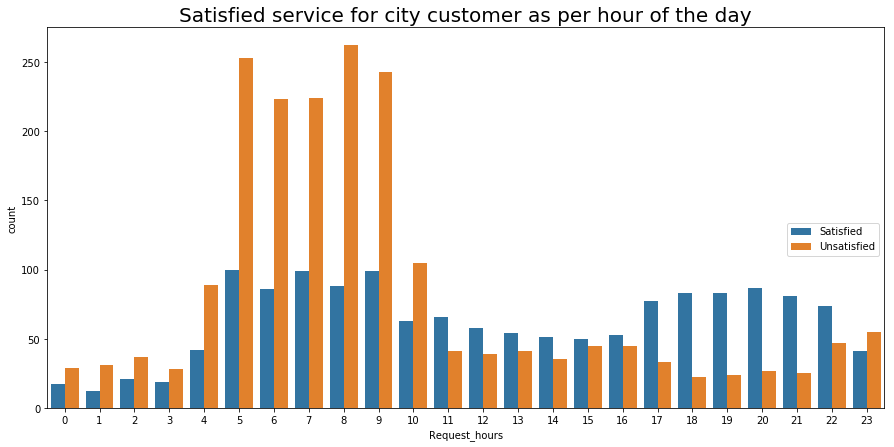

In [28]:
#Plot the satisfication of city customer as per hour of the day

plt.subplots(figsize = (15,7))
Plot2 = sns.countplot(x = 'Request_hours',hue = 'Service',data = uber_df_city2)
plt.title("Satisfied service for city customer as per hour of the day", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

### Most unsatisfied customers from city are at from 23:00 to 10:00 hours.

# Airport Wise Analysis

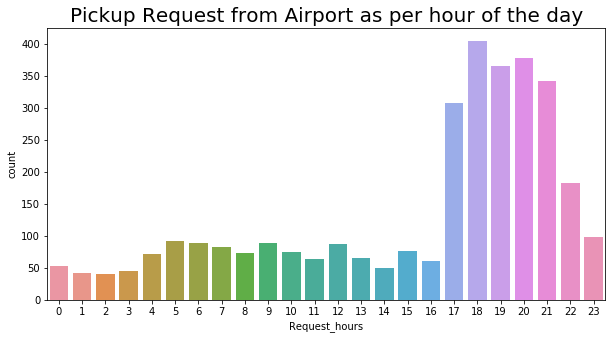

In [29]:
#Plot pickup request from airport as per hour of the day
uber_df_airport1 = uber_df1[(uber_df1['Pickup point'] == 'Airport')]

plt.subplots(figsize = (10, 5))
plt.title('Pickup Request from Airport as per hour of the day', size = 20)
sns.countplot(x = "Request_hours",  data = uber_df_airport1)

plt.show()

# The Gap between Supply and Demand (Airport)

In [30]:
# Total Demand in Airport
Total_Demand_Airport = uber_df2[(uber_df2["Pickup point"] == "Airport") & (uber_df2["Status"] == "Demand")] 
print(len(Total_Demand_Airport.index))

# Total Supply in Airport
Total_Supply_Airport = uber_df2[(uber_df2["Pickup point"] == "Airport") & (uber_df2["Status"] == "Supply")]
print(len(Total_Supply_Airport.index))

# Total Gap in Airport
Supply_Demand_Gap_Airport = uber_df2[(uber_df2["Pickup point"] == "Airport") & (uber_df2["Status"] == "Gap")] 
print(len(Supply_Demand_Gap_Airport.index))

#Percentage difference in demand supply
Percentage_Diff_Airport = (((len(uber_df2[(uber_df2["Pickup point"] == "Airport") & (uber_df2["Status"] == "Supply")].index))/
                            (len(uber_df2[(uber_df2["Pickup point"] == "Airport") & (uber_df2["Status"] == "Demand")].index)))*100)
print(Percentage_Diff_Airport)

3238
1327
1911
40.98208770846201


In [37]:
# To check the status of cabs per hour from airport

uber_df_airport1 = uber_df_airport.groupby(['Times_of_Day','Status']).count()['Request id'].unstack()
uber_df_airport1 = uber_df_airport1.fillna(0)
uber_df_airport1['Total'] = uber_df_airport1['Cancelled']+uber_df_airport1['No Cars Available']+uber_df_airport1['Trip Completed']
uber_df_airport1['Difference'] = uber_df_airport1['Total'] - uber_df_airport1['Trip Completed']

#To find the percentage difference
uber_df_airport1['Percentage_Difference_Airport'] = ((uber_df_airport1['Difference'] / uber_df_airport1['Total'])*100).round(2)
uber_df_airport1

Status,Cancelled,No Cars Available,Trip Completed,Total,Difference,Percentage_Difference_Airport
Times_of_Day,,,,,,
Afternoon,36,55,187,278,91,32.73
Evening,48,533,193,774,581,75.06
Late Evening,72,797,218,1087,869,79.94
Mid Night,6,151,188,345,157,45.51
Morning,33,41,399,473,74,15.64
Night,3,136,142,281,139,49.47


In [32]:
uber_df_airport2 = uber_df2[(uber_df2['Pickup point'] == 'Airport')] 
uber_df_airport2.loc[uber_df_airport2["Status"] == "Supply","Service"] = "Satisfied"
uber_df_airport2.loc[uber_df_airport2["Status"] == "Gap","Service"] = "Unsatisfied"

D:\Anaconda_Setup\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda_Setup\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


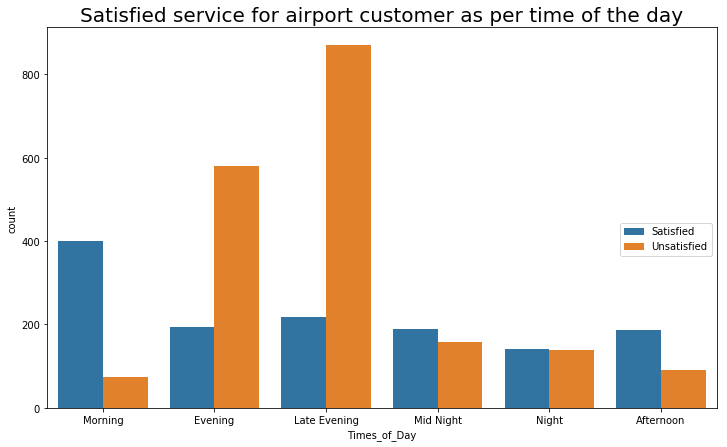

In [33]:
#Plot the satisfication of airport customer as per time of the day

plt.subplots(figsize = (12,7))
Plot2 = sns.countplot(x = 'Times_of_Day',hue = 'Service',data = uber_df_airport2)
plt.title("Satisfied service for airport customer as per time of the day", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

### Most unsatisfied customers from airport are in evening and late evening.

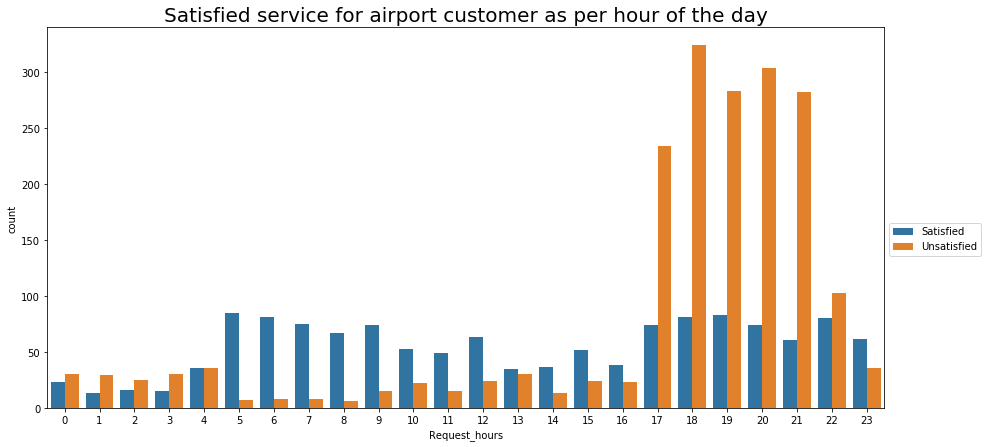

In [34]:
#Plot the satisfication of city customer as per hour of the day

plt.subplots(figsize = (15,7))
Plot2 = sns.countplot(x = 'Request_hours',hue = 'Service',data = uber_df_airport2)
plt.title("Satisfied service for airport customer as per hour of the day", size = 20)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'best')

### Most unsatisfied customers from airport are at from 17:00 to 22:00 hours.

In [40]:
uber_df1.to_csv("Uber_df1.csv")

In [41]:
uber_df.to_csv("Uber_df.csv")

# Recomendations

1. Special promotions or offers to be rolled out to encourage passengers to travel during non peak hours.

2. Increase the prices at peak hours to increase the profit and take the advantage of demand supply.

3. Reward points to be allocated to drivers sincerely driving in peak hours.

4. Special incentives can be given to loyal drivers and create awareness about the same among other drivers.

5. Constant motivation and awareness to all drivers through text messages, email and videos stating we value our people.

6. Heavy penalty and strict actions to be taken against the driver for repetitive cancellation of bookings.